In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
sns.set(font_scale=2.5)
import missingno as msno
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [3]:
df_train = pd.read_csv('databio/train.csv')
df_test = pd.read_csv('databio/test.csv')

In [4]:
df_train.head()

,id,rho,650_src,660_src,670_src,680_src,690_src,700_src,710_src,720_src,...,940_dst,950_dst,960_dst,970_dst,980_dst,990_dst,hhb,hbo2,ca,na
0,0,25,0.37950,0.42993,0.52076,0.57166,0.67818,0.75476,0.83580,0.93623,...,NaN,0.000000e+00,NaN,1.067504e-18,5.998949e-18,4.378513e-17,5.59,4.32,8.92,4.29
1,1,10,0.00000,0.00000,0.01813,0.00000,0.00000,0.01974,0.00321,0.00000,...,1.343132e-08,6.112685e-09,2.130547e-09,NaN,9.710091e-09,NaN,0.00,2.83,7.25,4.64
2,2,25,0.00000,0.03289,0.02416,0.03610,0.05843,0.09015,0.14944,0.18578,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.329725e-18,NaN,10.64,3.00,8.40,5.16
3,3,10,0.27503,0.31281,0.32898,0.41041,0.46587,0.52769,0.64369,0.73562,...,2.245998e-10,1.299511e-10,7.782625e-11,NaN,4.088921e-10,NaN,5.67,4.01,5.05,4.35
4,4,15,1.01521,1.00872,0.98930,0.98874,1.01773,1.01632,1.00009,0.98217,...,1.457955e-13,8.769053e-14,NaN,1.330237e-13,NaN,NaN,11.97,4.41,10.78,2.42


In [5]:
for i in range(650,1000,10):
    df_train[str(i)+'nm'] = df_train[str(i)+'_dst']/df_train[str(i)+'_src']

for i in range(650,1000,10):
    df_test[str(i)+'nm'] = df_test[str(i)+'_dst']/df_test[str(i)+'_src']

In [6]:
df_train = df_train.replace(np.inf,1)
df_train = df_train.fillna(1)
df_test = df_test.replace(np.inf,1)
df_test = df_test.fillna(1)

In [7]:
df_nm = df_train[[str(i)+'nm' for i in range(650,1000,10)]+['rho']]
df_nm2 = df_test[[str(i)+'nm' for i in range(650,1000,10)]+['rho']]

In [8]:
df_nm.head()

,650nm,660nm,670nm,680nm,690nm,700nm,710nm,720nm,730nm,740nm,...,910nm,920nm,930nm,940nm,950nm,960nm,970nm,980nm,990nm,rho
0,6.449954e-18,4.406712e-18,0.000000e+00,1.121805e-17,1.619863e-17,1.180129e-18,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,...,2.682411e-17,1.000000e+00,5.985132e-18,1.000000e+00,0.000000e+00,1.000000e+00,1.437910e-17,7.713706e-17,7.909164e-16,25
1,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,...,1.000000e+00,6.213321e-09,1.296920e-08,1.345783e-08,6.292266e-09,2.447638e-09,1.000000e+00,1.531222e-08,1.000000e+00,10
2,1.000000e+00,1.144296e-18,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,6.010206e-18,1.046767e-18,3.176558e-18,7.170964e-19,...,3.603440e-18,1.161261e-17,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.386971e-17,1.000000e+00,25
3,1.470740e-10,1.000000e+00,1.624829e-10,2.218973e-11,4.038590e-11,6.854783e-11,1.228799e-12,1.000000e+00,1.983145e-10,1.000000e+00,...,4.041843e-10,1.000000e+00,1.242449e-09,1.576471e-09,1.283341e-09,7.839067e-10,1.000000e+00,3.885699e-09,1.000000e+00,10
4,4.713065e-14,1.000000e+00,0.000000e+00,1.166221e-13,0.000000e+00,0.000000e+00,1.056896e-13,0.000000e+00,0.000000e+00,2.660915e-14,...,1.000000e+00,1.552445e-14,4.931379e-14,1.435575e-13,8.676045e-14,1.000000e+00,1.349166e-13,1.000000e+00,1.000000e+00,15


In [9]:
for i in range(650,1000,10):
    df_nm[str(i)+'nm'] = df_nm[str(i)+'nm'].map(lambda x:-np.log(x))

C:\Users\Playdata\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
C:\Users\Playdata\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [10]:
for i in range(650,1000,10):
    df_nm2[str(i)+'nm'] = df_nm2[str(i)+'nm'].map(lambda x:-np.log(x))

C:\Users\Playdata\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
C:\Users\Playdata\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [11]:
df_nm = df_nm.replace(np.inf,0)
df_nm2 = df_nm2.replace(np.inf,0)

In [12]:
for i in range(650,1000,10):
    df_nm[str(i)+'nm'] = df_nm[str(i)+'nm']/df_nm['rho']

for i in range(650,1000,10):
    df_nm2[str(i)+'nm'] = df_nm2[str(i)+'nm']/df_nm2['rho']

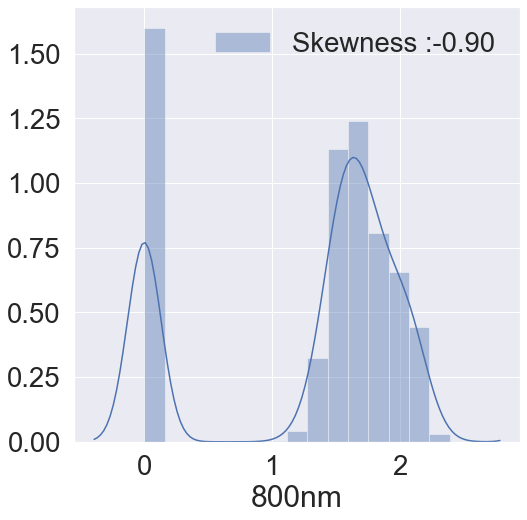

In [18]:
f,ax = plt.subplots(1,1,figsize=(8,8))
g = sns.distplot(df_nm['800nm'],color='b',label='Skewness :{:.2f}'.format(df_nm['800nm'].skew()),ax=ax)
g = g.legend(loc='best')

In [16]:
df_nm.drop('rho',axis=1,inplace=True)
df_nm2.drop('rho',axis=1,inplace=True)

In [35]:
from sklearn.ensemble import RandomForestRegressor

In [36]:
df_lable = df_train[['hhb', 'hbo2','ca', 'na']]
X_train = df_nm.values
ta1 = df_lable['hhb'].values
ta2 = df_lable['hbo2'].values
ta3 = df_lable['ca'].values
ta4 = df_lable['na'].values

In [37]:
model1 = RandomForestRegressor()
model1.fit(X_train,ta1)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [38]:
model2 = RandomForestRegressor()
model2.fit(X_train,ta2)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [39]:
model3 = RandomForestRegressor()
model3.fit(X_train,ta3)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [40]:
model4 = RandomForestRegressor()
model4.fit(X_train,ta4)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [41]:
submission = pd.read_csv('databio/sample_submission.csv')

In [42]:
submission['hhb'] = model1.predict(df_nm2.values)
submission['hbo2'] = model2.predict(df_nm2.values)
submission['ca'] = model3.predict(df_nm2.values)
submission['na'] = model4.predict(df_nm2.values)

In [43]:
submission.to_csv('./bio4_submission.csv',index=False)

In [1]:
f,ax = plt.subplots(1,1,figsize=(8,8))
g = sns.distplot(df_train['700nm'],color='b',label='Skewness :{:.2f}'.format(df_train['Fare'].skew()),ax=ax)
g = g.legend(loc='best')

NameError: name 'plt' is not defined

In [ ]:
'''
2 : 700 ~ 900
3 : 650 ~ 990
4 : inf => 0
'''